In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [75]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

calibration_img_path = 'calibration_wide/'
img_glob = calibration_img_path + 'GO*.jpg'

def calibrate_camera(img_glob):
    objp = np.zeros((6*8,3), np.float32)
    print("objp.shape = " + str(objp.shape))
    objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob(img_glob)

    # Step through the list and search for chessboard corners
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            cv2.drawChessboardCorners(img, (8,6), corners, ret)
            nx = 8
            ny = 6

            #write_name = 'corners_found'+str(idx)+'.jpg'
            #cv2.imwrite(write_name, img)
            cv2.imshow('img', img)
            cv2.waitKey(500)

    cv2.destroyAllWindows()

objp.shape = (48, 3)
Corners[0][0][0] = 125.487
Corners[7] = 249.836
Corners[40] = [[ 235.95440674  758.82104492]]
Corners[47] = [[ 882.52972412  904.7868042 ]]
Corners[0][0][0] = 244.745
Corners[7] = 161.267
Corners[40] = [[ 258.18740845  756.31390381]]
Corners[47] = [[ 1069.94714355   755.52069092]]
Corners[0][0][0] = 251.587
Corners[7] = 206.97
Corners[40] = [[ 468.67877197  870.62255859]]
Corners[47] = [[ 1006.90270996   611.24969482]]
Corners[0][0][0] = 214.593
Corners[7] = 225.188
Corners[40] = [[ 267.04751587  744.54071045]]
Corners[47] = [[ 956.76678467  825.53039551]]
Corners[0][0][0] = 462.554
Corners[7] = 270.084
Corners[40] = [[ 479.06439209  749.14825439]]
Corners[47] = [[ 1021.06872559   637.81341553]]
Corners[0][0][0] = 110.564
Corners[7] = 214.648
Corners[40] = [[ 242.5406189   784.19970703]]
Corners[47] = [[ 965.54608154  866.95898438]]
Corners[0][0][0] = 212.425
Corners[7] = 286.659
Corners[40] = [[ 369.45233154  890.97167969]]
Corners[47] = [[ 1044.25048828   762.438

KeyboardInterrupt: 

In [6]:
type(imgpoints)

list

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

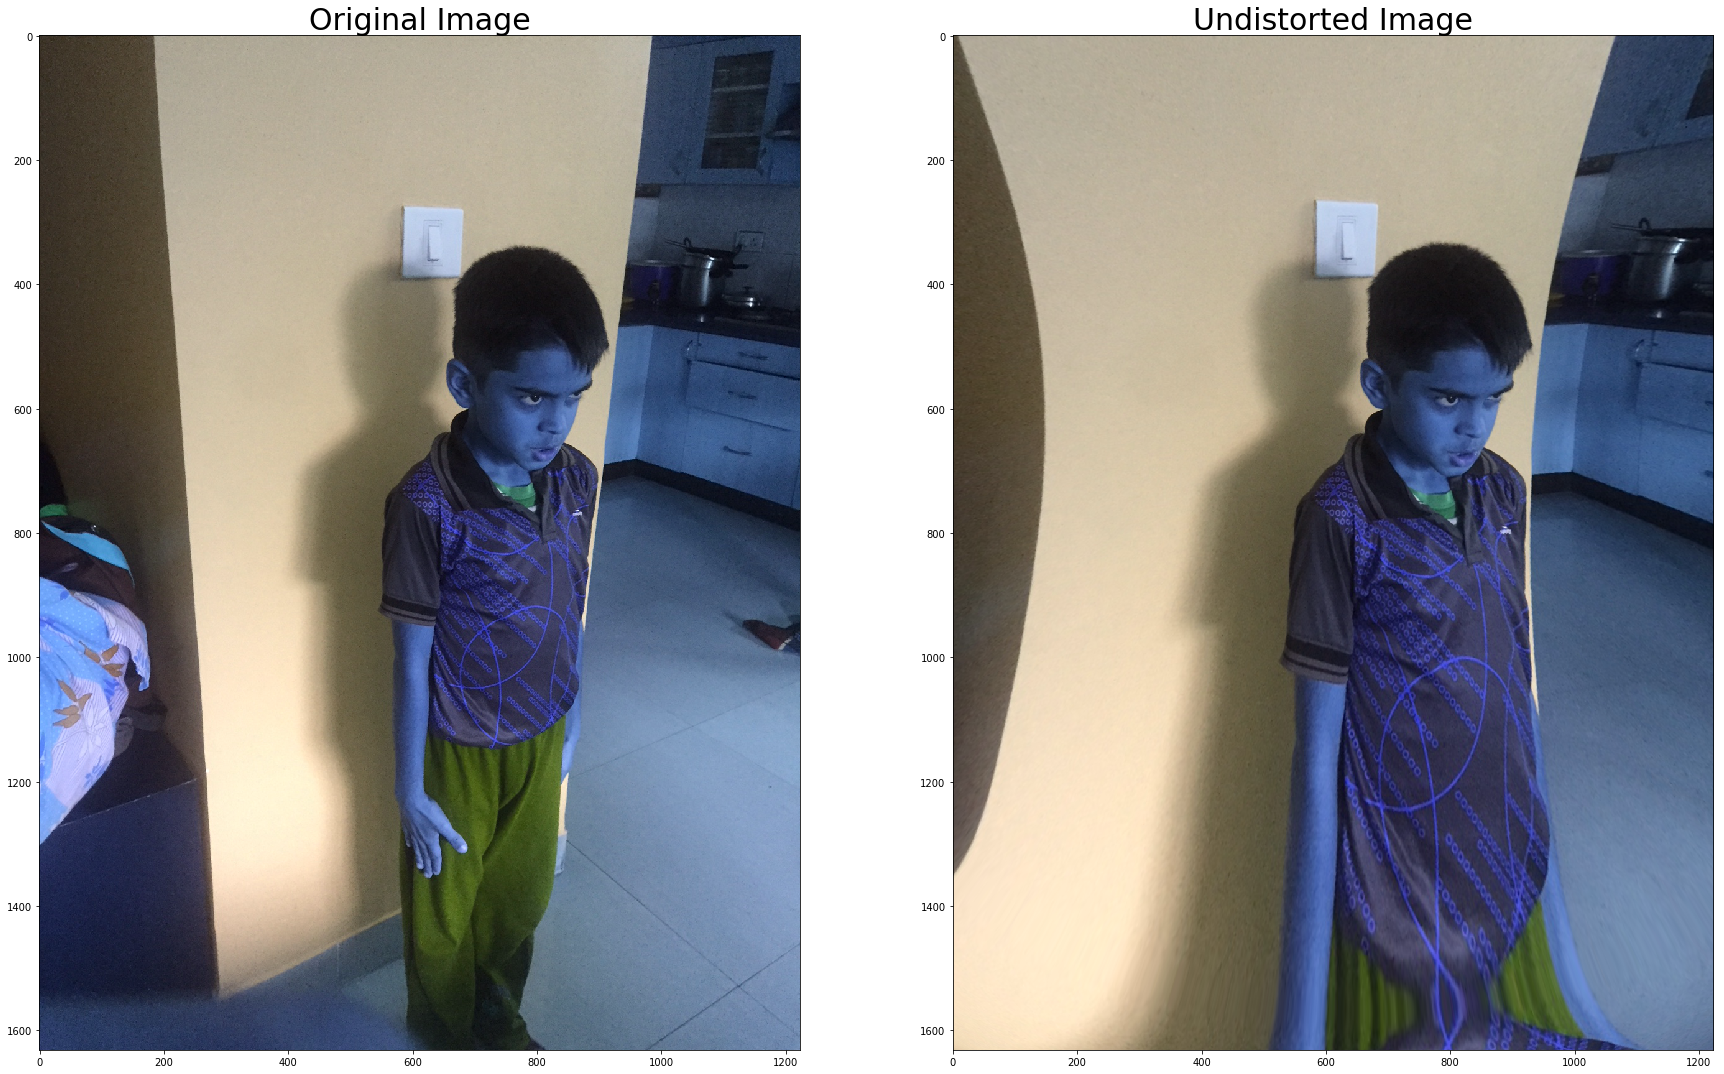

In [63]:
import pickle
%matplotlib inline

# Test undistortion on an image
#img = cv2.imread('calibration_wide/test_image.jpg')

img = cv2.imread('calibration_wide/IMG_9255.JPG')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_IMG_9255_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,30))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [60]:
np.mgrid[0:8, 0:6].T.reshape(-1,2).shape

(48, 2)

In [61]:
np.mgrid[0:8, 0:6].T.reshape(-1,2).shape

(48, 2)

In [20]:
objp.shape

(48, 3)

In [86]:
import matplotlib.image as mpimg
%matplotlib qt

img = mpimg.imread('calibration_wide/stop_sign.jpg')
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
#plt.imshow(sxbinary, cmap='gray')

abs_sobely = np.absolute(sobely)
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

sybinary = np.zeros_like(scaled_sobely)
sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1
plt.imshow(sybinary, cmap='gray')